In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diamonds.csv')
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


A data frame with 53940 rows and 10 variables:

* price: price in US dollars (\$326--\$18,823)
* carat: weight of the diamond (0.2--5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color: diamond colour, from J (worst) to D (best)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: length in mm (0--10.74)
* y: width in mm (0--58.9)
* z: depth in mm (0--31.8)
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)

In [3]:
data.shape

(53940, 11)

In [4]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [5]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [6]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [7]:
data.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [8]:
data.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
data.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [10]:
cut = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}
color = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3, 'I':2, 'J':1}
clarity = {'I1':1,'SI2':2, 'SI1':3,  'VS2':4, 'VS1':5,'VVS2':6, 'VVS1':7,  'IF':8}

In [11]:
data['cut'] = data['cut'].map(cut)

In [12]:
data['color'] = data['color'].map(color)
data['clarity'] = data['clarity'].map(clarity)

In [13]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut             int64
color           int64
clarity         int64
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [14]:
data.clarity.unique()

array([2, 3, 5, 4, 6, 7, 1, 8], dtype=int64)

In [15]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
data = data.drop('Unnamed: 0', axis=1)


In [17]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [28]:
x = data.drop('price', axis=1)
y = data['price']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [30]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)5

In [31]:
x_train

array([[0.02079002, 0.75      , 0.5       , ..., 0.40782123, 0.07368421,
        0.08333333],
       [0.17879418, 0.5       , 0.5       , ..., 0.60707635, 0.11137521,
        0.12578616],
       [0.16632017, 0.25      , 1.        , ..., 0.59124767, 0.10831919,
        0.12672956],
       ...,
       [0.14553015, 0.5       , 0.16666667, ..., 0.57914339, 0.10611205,
        0.12044025],
       [0.04573805, 0.5       , 0.33333333, ..., 0.44599628, 0.08098472,
        0.09496855],
       [0.01039501, 0.5       , 0.66666667, ..., 0.37430168, 0.06842105,
        0.07861635]])

In [32]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.965084228760096

In [33]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


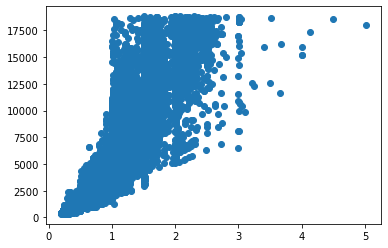

In [34]:
plt.scatter(data.carat, data.price)

In [35]:
y_pred = model.predict(x_test)

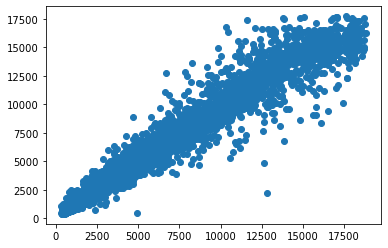

In [36]:
plt.scatter(y_test, y_pred)